In [39]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np
# from statsmodels.tsa.stattools import kpss, adfuller
from scipy.signal import butter, lfilter


In [32]:
# ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
ipath = 'D:/Dropbox/WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH_SAT_O2,PLETH_HR,PLETH_PERF_REL,ECG_HR,ECG_II,PLETH,PLETH,CO2,AWP,...,PI,PAMB_MBAR,VENT_LEAK,ST_II,SPO2,BPM,NIBP_SYS,NIBP_DIA,NIBP_MEAN,PVI
0,0.000000,,,,,,,,0.000000,2.010000,...,,,,,,,,,,
1,1.000000,,,,,,,,0.000000,2.000000,...,,,,,,,,,,
2,2.000000,,,,,0.015001,62.759464,,0.000000,1.990000,...,,,,,,,,,,
3,3.000000,,,,,-0.059999,70.525032,0.000000,0.000000,2.000000,...,,,,,,,,,,
4,4.000000,100.000000,72.000000,2.000000,66.000000,0.045001,29.621490,0.000000,0.000000,2.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1610.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,985.000000,15.000000,,,,177.000000,116.000000,133.000000,
1611,1611.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1612,1612.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1613,1613.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,,,,


In [34]:
# PLENTH
df.iloc[2:1612, [0, 6]]

,Time,PLETH
2,2.000000,62.759464
3,3.000000,70.525032
4,4.000000,29.621490
5,5.000000,45.299145
6,6.000000,51.623932
...,...,...
1607,1607.000000,50.012211
1608,1608.000000,50.012211
1609,1609.000000,50.012211
1610,1610.000000,50.012211


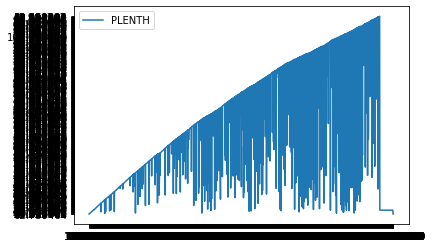

In [38]:
plt.plot(df.iloc[:, 0], df.iloc[:, 6], label='PLENTH')
plt.legend() 
plt.show()

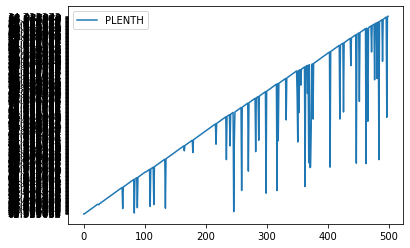

In [36]:
# df.head() 
# len(df['ECG_HR'])
# plt.figure(figsize=(40, 20))
# plt.plot(df['ECG_HR'], 'r--', label='ECG_HR')
plt.plot(df.iloc[:500, 6], label='PLENTH')
plt.legend() 
plt.show()
# plt.plot(df.iloc[:, 6])

In [58]:
# setting
Fs = 1000.
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

# Signal x (20Hz) + Signal y (50Hz)
x = np.cos(2 * np.pi * 20 * t)
y = np.cos(2 * np.pi * 50 * t)

# Signal z
z = x + y

type(z), z.shape, z.dtype

(numpy.ndarray, (1000,), dtype('float64'))

In [64]:
t = np.array(df.iloc[2:1612, 0]).astype('float64')

In [60]:
z = np.array(df.iloc[2:1612, 6]).astype('float64')
type(z), z.shape, z.dtype

(numpy.ndarray, (1610,), dtype('float64'))

In [74]:
def BPF(series, low, high, order=1):
    '''
    series : 데이터
    low : 최저 구간(0< low < 1)
    high : 최고 구간(0< high < 1)
    order : 필터 계수, 높을수록 민감
    '''
    b, a = butter(N = order, Wn = [low, high], btype = 'band')
    bpf_series = lfilter(b, a, series)

    return bpf_series

def LPF(series, low, order=1):
    '''
    series : 데이터
    low : 최저 구간(0< low < 1)
    order : 필터 계수, 높을수록 민감
    '''
    
    b, a = butter(N = order, Wn = low, btype = 'low')
    lpf_series = lfilter(b, a, series)
    
    return lpf_series
    
def HPF(series, high, order=1):
    '''
    series : 데이터
    high : 최고 구간(0< low < 1)
    order : 필터 계수, 높을수록 민감
    '''
    
    b, a = butter(N = order, Wn = high, btype = 'high')
    hpf_series = lfilter(b, a, series)
    
    return hpf_series

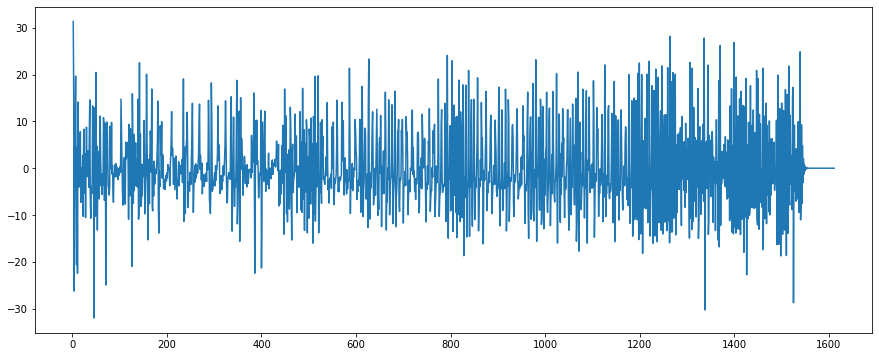

In [65]:
z_bpf = BPF(z, 0.4, 0.9, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_bpf)
plt.show()

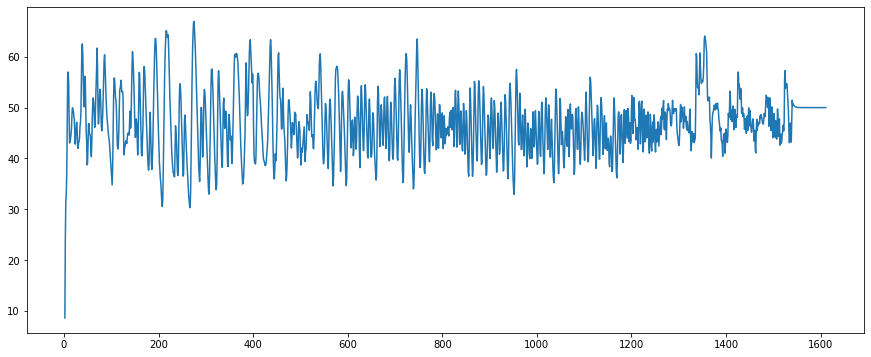

In [75]:
z_lpf = LPF(z, 0.1, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_lpf)
plt.show()

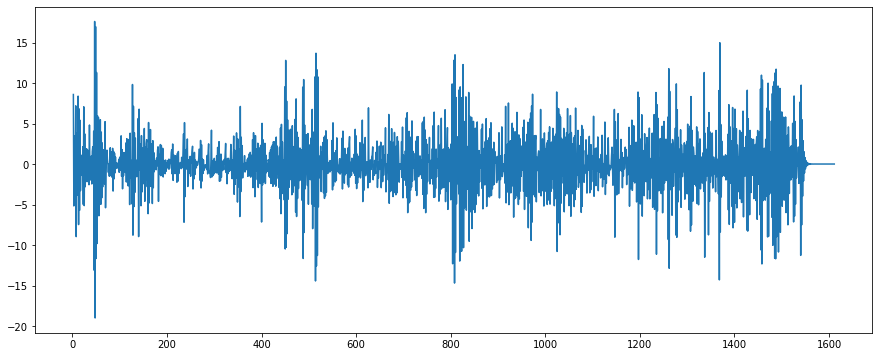

In [76]:
z_hpf = HPF(z, 0.9, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_hpf)
plt.show()